# 2. Evaluation Project  -  (Avocados Project)

# <span style="color:red">By :- Punit Vishal Singh</span>

# <span style="color:blue">-----------------------------------------------------------------------------------------------------------------</span>

- Avocado is a fruit consumed by people heavily in the United States.

- Avocados are a source of vitamins C, E, K, and B6, as well as riboflavin, niacin, folate, pantothenic acid, magnesium, and potassium. They also provide lutein, beta carotene, and omega-3 fatty acids. Avocados contain high levels of healthy, beneficial fats, which can help a person feel fuller between meals.

__Why is avocado is consumed?__
1. Rich in nutrients
2. Healthy for the heart
3. Great for vision
4. May help prevent osteoporosis
5. Components may prevent cancer
6. Supporting fetal health
7. Reducing depression risk
8. Improving digestion
9. Natural detoxification
10. Protection from chronic disease

# <span style="color:red">--------------------------------------> Problem Statement <-------------------------------------------</span>

1. To Classify as __Organic__ & __Conventional Type__. 
2. To perform __Regression__ in order to predict the __Average price__ using Regression model from different __Year__ 

### <span style="color:green">-> Import Packages</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 

### <span style="color:green">-> Loading The Dataset...............</span>

In [2]:
df=pd.read_csv("avocado_file.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### <span style="color:blue">NOTE:-</span>
Here,
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### <span style="color:green">-> To check the number of columns of object datatype</span>

In [5]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 3


In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


### <span style="color:green">-> Checking Column Names</span>

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

### <span style="color:green">-> Checking Null/Missing Values</span>

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### <span style="color:green">-> To Drop Unnamed: 0 Column </span>
Because it is not require for the further process 

In [10]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [11]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [13]:
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


# <span style="color:red">Exploratory Data Analysis (EDA)</span>

In [14]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

#### <span style="color:blue">Observation:-</span>

- In the given dataset, data is divided into Organic and Conventional types.

In [15]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

#### <span style="color:blue">Observation:-</span>

- In the given dataset we have the record of 4 years in dataset
- we can use different years for analysis which is 2015,2016,2017 &2018.<br>


### <span style="color:green">-> Understanding Type of Avocado & Average Price with the help of Countplot</span>

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

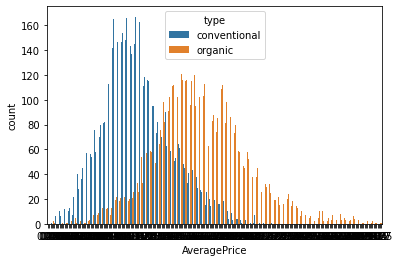

In [16]:
sns.countplot(x='AveragePrice',hue='type',data=df)

#### <span style="color:blue">Observation:-</span>

- From the above representation, we can clearly see that the Organic fruit price is more as compared to conventional fruit.

### <span style="color:green"> -> Label Encoding</span>

In [17]:
label = LabelEncoder()
dicts = {}

label.fit(df.type.drop_duplicates()) 
dicts['Type'] = list(label.classes_)
df.type = label.transform(df.type)

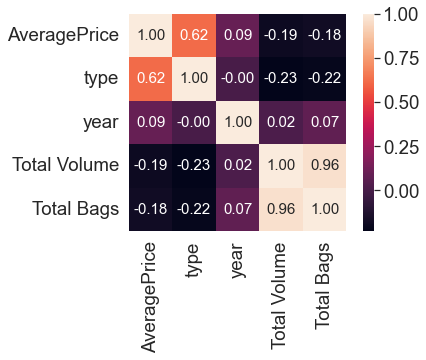

In [18]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

#### <span style="color:blue">Observation:-</span>

- There is a strong relation between Total Bags and Total Volume which is 0.96 
- The relation between type and Average Price is 0.62.
- In case of other, there is weak realation.

### <span style="color:green">-> Understanding Total Bags with Small Bags, Large Bags and XLarge Bags with the help of Pairplot</span>

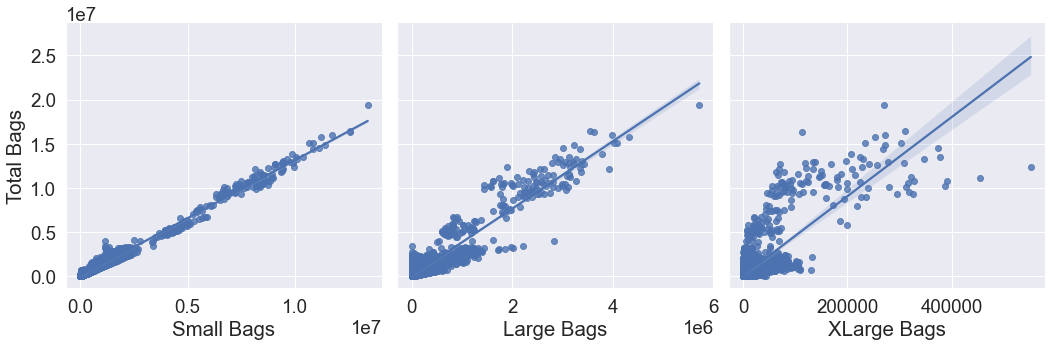

In [19]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

### <span style="color:green">-> Understanding Total Volume with Small Bags, Large Bags and XLarge Bags with the help of Pairplot</span>

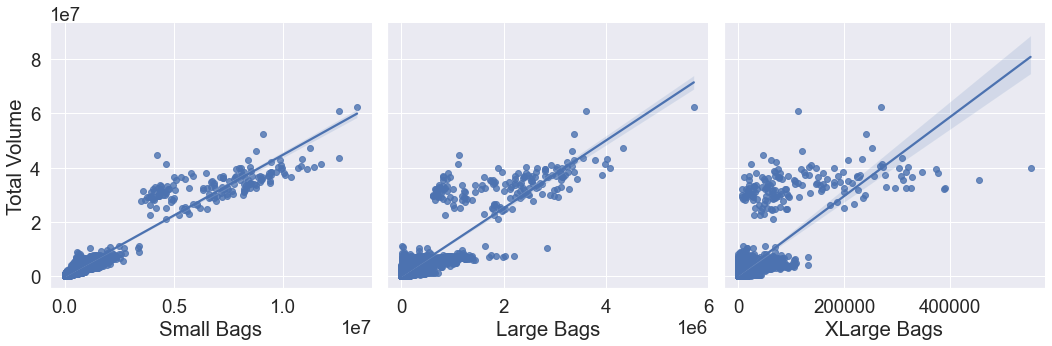

In [20]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

#### <span style="color:blue">Based on Above Observation We Can Say That:-</span>

- There is a strong co-relation between Total Volume Vs Small and TotalBags Vs SmallBags.
- There is a weak co-relation between Total Volume Vs XLarge and TotalBags Vs XLargeBags.

### <span style="color:green">-> Understanding Region With Year distribution </span>

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

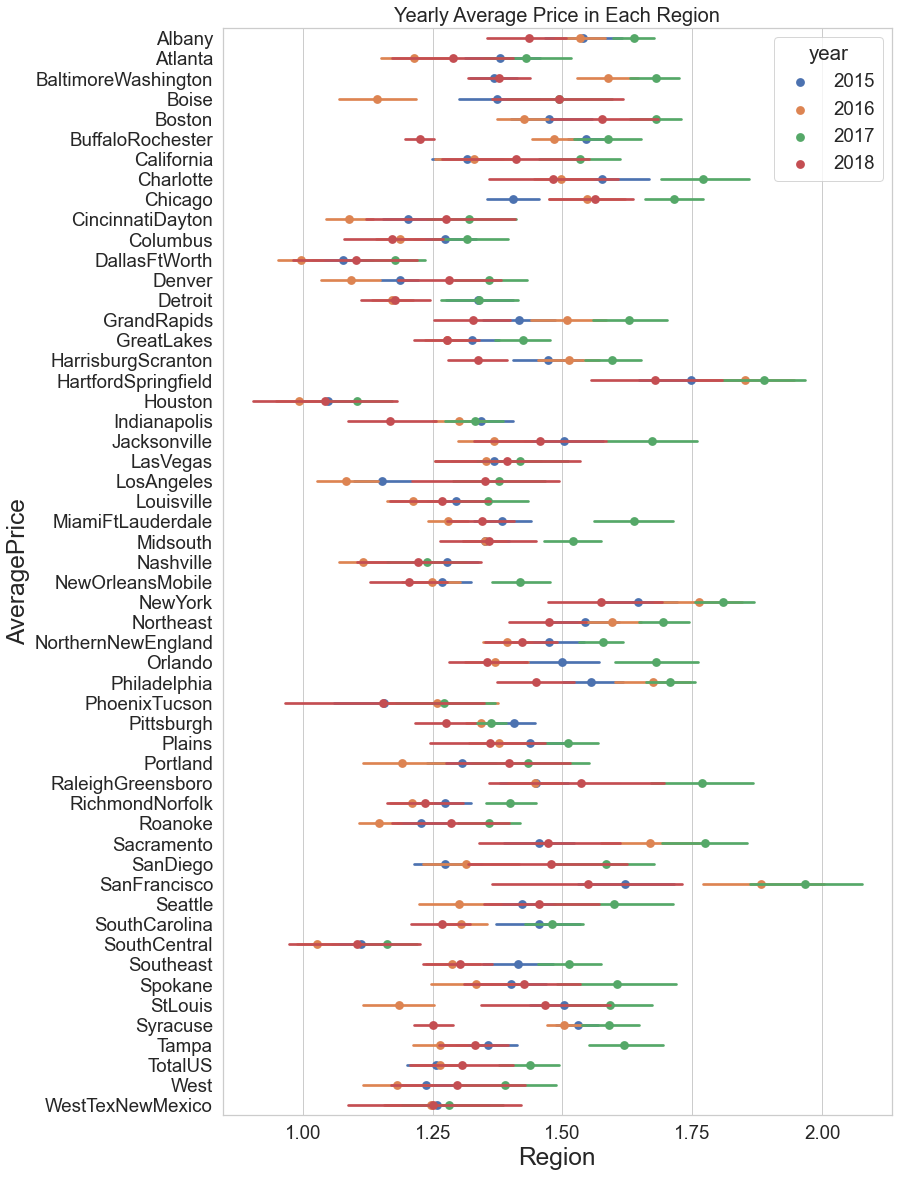

In [21]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

#### <span style="color:blue">Based on Above Observation We Can Say That:-</span>

- HartfordSpringfield is the major consumer of Avocado in 2017.


### <span style="color:green">-> Understanding Region With AveragePrice distribution</span>

Text(0.5, 1.0, 'Type Average Price in Each Region')

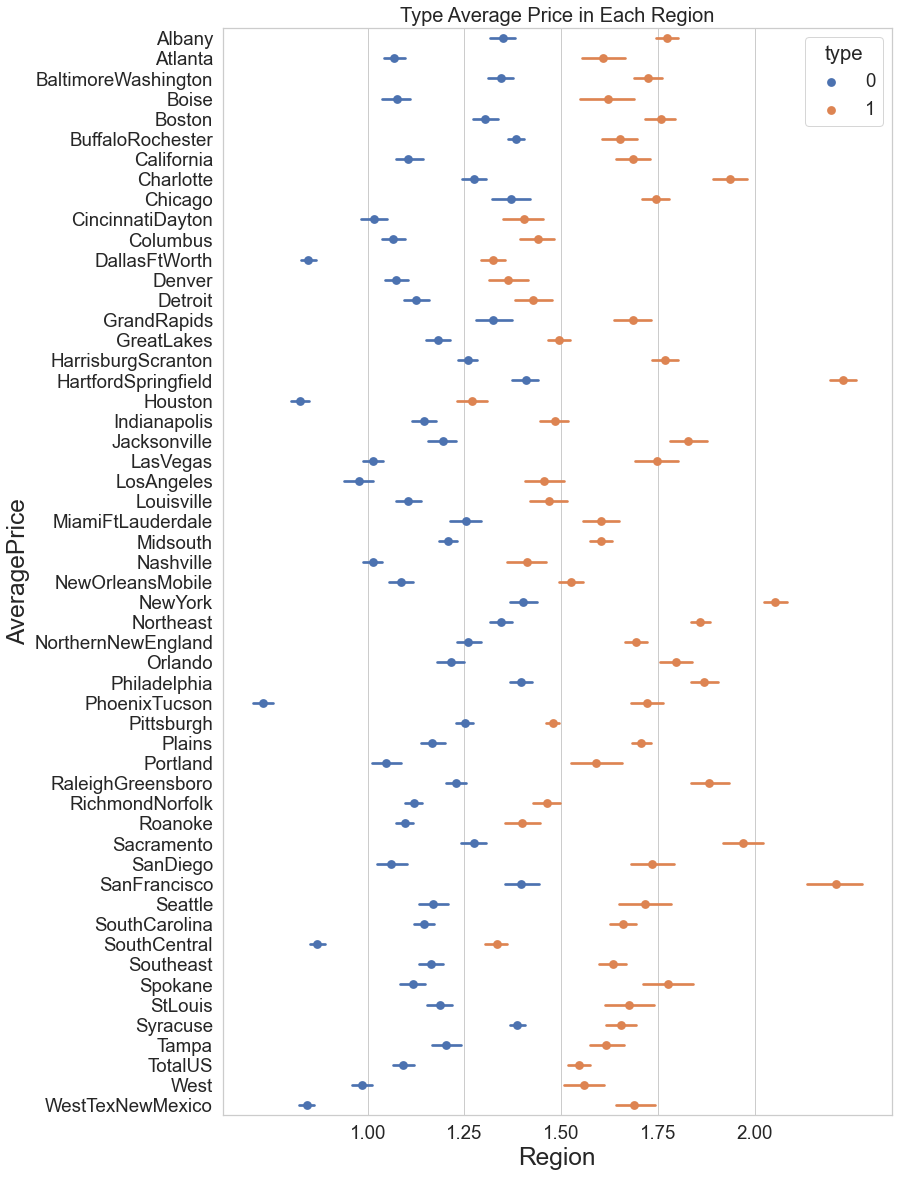

In [22]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

#### <span style="color:blue">Based on Above Observation We Can Say That:-</span>

- The Price of Organic Type of Avocado is high in HartfordSpringfield region and Sanfrancisco region.
- And there is an average price (<1.50$) for Conventional Type of Avocado. 

# <span style="color:red">Classifying The Types of Avocado</span>

### <span style="color:green">-> Spliting the data for training & testing </span>

In [23]:
# independent column

X = df[['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [24]:
X

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0
...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0


In [25]:
# target

y= df.type

In [26]:
y

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 1)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [28]:
print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 7)
Y Train Shape  (14599,)
X Test Shape  (3650, 7)
Y Test Shape  (3650,)


## <span style="color:green">-> Using Logistic Regression</span>

In [29]:
# To call LogisticRegression

from sklearn.linear_model import LogisticRegression

In [30]:
#Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)  
y_pred_test = lr.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('---------')


Accuracy score for Logistic Regression test data is: 0.9402739726027397
---------


## <span style="color:blue">-> Using Confusion matrix</span>

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Organic','Conventional']
confusion_matrix.columns = ['Predicted Organic','Predicted Conventional']
print("Confusion Matrix For Logistic Regression Model")
print(confusion_matrix)

Confusion Matrix For Logistic Regression Model
              Predicted Organic  Predicted Conventional
Organic                    1664                     184
Conventional                 34                    1768


## <span style="color:blue">-> Using AUC - ROC Curve</span>

In [32]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [33]:
y_pred_prob=lr.predict_proba(X_test)[:,1]

In [34]:
y_pred_prob

array([9.41275154e-001, 6.77460828e-005, 4.58943216e-004, ...,
       7.51243397e-001, 7.56379459e-230, 9.64489375e-001])

In [35]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [36]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.41125541e-04,
       5.41125541e-04, 1.08225108e-03, 1.08225108e-03, 1.62337662e-03,
       1.62337662e-03, 2.16450216e-03, 2.16450216e-03, 2.70562771e-03,
       2.70562771e-03, 3.24675325e-03, 3.24675325e-03, 3.78787879e-03,
       3.78787879e-03, 4.32900433e-03, 4.32900433e-03, 4.87012987e-03,
       4.87012987e-03, 5.41125541e-03, 5.41125541e-03, 5.95238095e-03,
       5.95238095e-03, 6.49350649e-03, 6.49350649e-03, 7.03463203e-03,
       7.03463203e-03, 7.57575758e-03, 7.57575758e-03, 8.11688312e-03,
       8.11688312e-03, 9.19913420e-03, 9.19913420e-03, 9.74025974e-03,
       9.74025974e-03, 1.02813853e-02, 1.02813853e-02, 1.08225108e-02,
       1.08225108e-02, 1.13636364e-02, 1.13636364e-02, 1.19047619e-02,
       1.19047619e-02, 1.24458874e-02, 1.24458874e-02, 1.29870130e-02,
       1.29870130e-02, 1.35281385e-02, 1.35281385e-02, 1.40692641e-02,
       1.40692641e-02, 1.46103896e-02, 1.46103896e-02, 1.51515152e-02,
      

In [37]:
tpr

array([0.00000000e+00, 5.54938957e-04, 1.33185350e-02, 1.33185350e-02,
       6.77025527e-02, 6.77025527e-02, 7.99112098e-02, 7.99112098e-02,
       1.05993341e-01, 1.05993341e-01, 1.47613762e-01, 1.47613762e-01,
       2.63041065e-01, 2.63041065e-01, 5.16093230e-01, 5.16093230e-01,
       6.36514983e-01, 6.36514983e-01, 6.52053274e-01, 6.52053274e-01,
       7.13096559e-01, 7.13096559e-01, 7.24750277e-01, 7.24750277e-01,
       7.79134295e-01, 7.79134295e-01, 8.02996670e-01, 8.02996670e-01,
       8.10210877e-01, 8.10210877e-01, 8.12430633e-01, 8.12430633e-01,
       8.20754717e-01, 8.20754717e-01, 8.25194229e-01, 8.25194229e-01,
       8.27413984e-01, 8.27413984e-01, 8.28523862e-01, 8.28523862e-01,
       8.36847947e-01, 8.36847947e-01, 8.45172031e-01, 8.45172031e-01,
       8.45726970e-01, 8.45726970e-01, 8.54605993e-01, 8.54605993e-01,
       8.64594895e-01, 8.64594895e-01, 8.66259711e-01, 8.66259711e-01,
       8.74583796e-01, 8.74583796e-01, 8.78468368e-01, 8.78468368e-01,
      

In [38]:
thresholds

array([1.99987416e+000, 9.99874161e-001, 9.84424004e-001, 9.84295782e-001,
       9.71564241e-001, 9.71517680e-001, 9.69771880e-001, 9.69755281e-001,
       9.66432209e-001, 9.66388664e-001, 9.61555791e-001, 9.61499417e-001,
       9.52729702e-001, 9.52712174e-001, 9.36922293e-001, 9.36912960e-001,
       9.27285485e-001, 9.27153721e-001, 9.25759224e-001, 9.25689710e-001,
       9.19081420e-001, 9.18802022e-001, 9.17332898e-001, 9.17254238e-001,
       9.09192563e-001, 9.09048510e-001, 9.04886164e-001, 9.04869720e-001,
       9.03432223e-001, 9.03352381e-001, 9.02820762e-001, 9.02729777e-001,
       9.01284641e-001, 9.01042136e-001, 9.00115993e-001, 8.99716358e-001,
       8.99342692e-001, 8.99316586e-001, 8.99166186e-001, 8.98832454e-001,
       8.97062771e-001, 8.97046065e-001, 8.94603761e-001, 8.94575298e-001,
       8.94502556e-001, 8.94301693e-001, 8.91653785e-001, 8.91612204e-001,
       8.89194576e-001, 8.89083676e-001, 8.88842937e-001, 8.88717062e-001,
       8.86301094e-001, 8

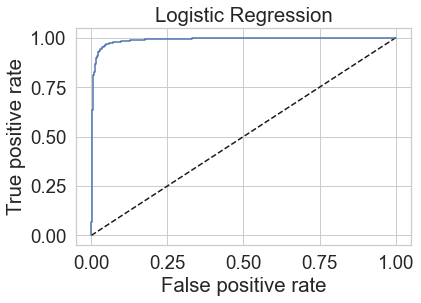

In [39]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

## <span style="color:green">-> Using Random forest classifier</span>

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('---------')


Accuracy score for test data using Random Forest : 0.996986301369863
---------


## <span style="color:blue">-> Using Confusion matrix</span>

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Organic','Conventional']
confusion_matrix.columns = ['Predicted Organic','Predicted Conventional']
print("Confusion Matrix For Random forest Model")
print(confusion_matrix)


Confusion Matrix For Random forest Model
              Predicted Organic  Predicted Conventional
Organic                    1841                       7
Conventional                  4                    1798


## <span style="color:blue">-> Using AUC - ROC Curve</span>

In [43]:
y_pred_prob=lr.predict_proba(X_test)[:,1]

In [44]:
y_pred_prob

array([9.41275154e-001, 6.77460828e-005, 4.58943216e-004, ...,
       7.51243397e-001, 7.56379459e-230, 9.64489375e-001])

In [45]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

In [46]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.41125541e-04,
       5.41125541e-04, 1.08225108e-03, 1.08225108e-03, 1.62337662e-03,
       1.62337662e-03, 2.16450216e-03, 2.16450216e-03, 2.70562771e-03,
       2.70562771e-03, 3.24675325e-03, 3.24675325e-03, 3.78787879e-03,
       3.78787879e-03, 4.32900433e-03, 4.32900433e-03, 4.87012987e-03,
       4.87012987e-03, 5.41125541e-03, 5.41125541e-03, 5.95238095e-03,
       5.95238095e-03, 6.49350649e-03, 6.49350649e-03, 7.03463203e-03,
       7.03463203e-03, 7.57575758e-03, 7.57575758e-03, 8.11688312e-03,
       8.11688312e-03, 9.19913420e-03, 9.19913420e-03, 9.74025974e-03,
       9.74025974e-03, 1.02813853e-02, 1.02813853e-02, 1.08225108e-02,
       1.08225108e-02, 1.13636364e-02, 1.13636364e-02, 1.19047619e-02,
       1.19047619e-02, 1.24458874e-02, 1.24458874e-02, 1.29870130e-02,
       1.29870130e-02, 1.35281385e-02, 1.35281385e-02, 1.40692641e-02,
       1.40692641e-02, 1.46103896e-02, 1.46103896e-02, 1.51515152e-02,
      

In [47]:
tpr

array([0.00000000e+00, 5.54938957e-04, 1.33185350e-02, 1.33185350e-02,
       6.77025527e-02, 6.77025527e-02, 7.99112098e-02, 7.99112098e-02,
       1.05993341e-01, 1.05993341e-01, 1.47613762e-01, 1.47613762e-01,
       2.63041065e-01, 2.63041065e-01, 5.16093230e-01, 5.16093230e-01,
       6.36514983e-01, 6.36514983e-01, 6.52053274e-01, 6.52053274e-01,
       7.13096559e-01, 7.13096559e-01, 7.24750277e-01, 7.24750277e-01,
       7.79134295e-01, 7.79134295e-01, 8.02996670e-01, 8.02996670e-01,
       8.10210877e-01, 8.10210877e-01, 8.12430633e-01, 8.12430633e-01,
       8.20754717e-01, 8.20754717e-01, 8.25194229e-01, 8.25194229e-01,
       8.27413984e-01, 8.27413984e-01, 8.28523862e-01, 8.28523862e-01,
       8.36847947e-01, 8.36847947e-01, 8.45172031e-01, 8.45172031e-01,
       8.45726970e-01, 8.45726970e-01, 8.54605993e-01, 8.54605993e-01,
       8.64594895e-01, 8.64594895e-01, 8.66259711e-01, 8.66259711e-01,
       8.74583796e-01, 8.74583796e-01, 8.78468368e-01, 8.78468368e-01,
      

In [48]:
thresholds

array([1.99987416e+000, 9.99874161e-001, 9.84424004e-001, 9.84295782e-001,
       9.71564241e-001, 9.71517680e-001, 9.69771880e-001, 9.69755281e-001,
       9.66432209e-001, 9.66388664e-001, 9.61555791e-001, 9.61499417e-001,
       9.52729702e-001, 9.52712174e-001, 9.36922293e-001, 9.36912960e-001,
       9.27285485e-001, 9.27153721e-001, 9.25759224e-001, 9.25689710e-001,
       9.19081420e-001, 9.18802022e-001, 9.17332898e-001, 9.17254238e-001,
       9.09192563e-001, 9.09048510e-001, 9.04886164e-001, 9.04869720e-001,
       9.03432223e-001, 9.03352381e-001, 9.02820762e-001, 9.02729777e-001,
       9.01284641e-001, 9.01042136e-001, 9.00115993e-001, 8.99716358e-001,
       8.99342692e-001, 8.99316586e-001, 8.99166186e-001, 8.98832454e-001,
       8.97062771e-001, 8.97046065e-001, 8.94603761e-001, 8.94575298e-001,
       8.94502556e-001, 8.94301693e-001, 8.91653785e-001, 8.91612204e-001,
       8.89194576e-001, 8.89083676e-001, 8.88842937e-001, 8.88717062e-001,
       8.86301094e-001, 8

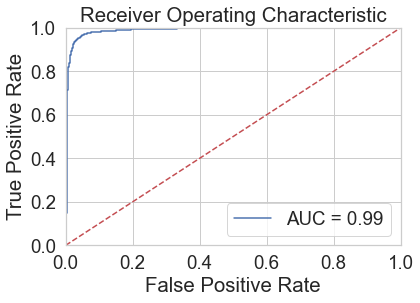

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# <span style="color:red">Predicting Average Price of Avocado</span>

### <span style="color:blue">__Note__:-</span>

Here, We are going to calculate __Average Price of Avocado__ with the reference of __['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']__ columns & saving as __data_avocado_sc__.

In [50]:
df.drop(['Date', 'Total Volume', 'Total Bags', 'region', 'year'], axis = 1,inplace = True)

In [51]:
df.columns

Index(['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type'],
      dtype='object')

In [52]:
sc = StandardScaler().fit(df)
data_avocado_sc = sc.transform(df)
data_avocado = pd.DataFrame(data_avocado_sc)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

,AveragePrice,Small,Large,XLarge,SmallBags,LargeBags,XLargeBags,Type
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836


### <span style="color:green">-> Spliting the data for training & testing </span>

In [53]:
feature_cols = ['Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
X = data_avocado[feature_cols]

In [54]:
y = data_avocado.AveragePrice

In [55]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [56]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


## <span style="color:green">-> Using Linear Regression model</span>

In [57]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    
    if not(gridsearch):
        lr.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        lr = GridSearchCV(lr,parameters, cv = 10)
        lr.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", lr.best_score_)  
        
        y_pred_test = lr.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return lr

In [58]:
lr = linear_reg(X,y)

In [59]:
lr.score(X,y)
print('Intercept:',lr.intercept_)                                           # print the intercept 
print('Coefficients:',lr.coef_)

Intercept: -0.002505711970250271
Coefficients: [-0.31332629  0.32039105 -0.12354322  0.06163263 -0.07300029  0.07633143
  0.60580356]


In [60]:
feature_cols.insert(0,'Intercept')
coef = lr.coef_.tolist()
coef.insert(0, lr.intercept_)

In [61]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.002505711970250271
Small -0.3133262880926914
Large 0.3203910517486838
XLarge -0.12354321842178195
SmallBags 0.06163262769036363
LargeBags -0.07300028791378153
XLargeBags 0.07633142768206123
Type 0.6058035608004645


#### <span style="color:blue">Observation:-</span>

__Here,__
- Y = -0.002 

- (Small `*` 0.313) + (Large `*` 0.320) - (XLarge `*` 0.123) + (SmallBags `*` 0.061) - (LargeBags `*` 0.073) + (XLargeBags `*` 0.076) + Type `*` 0.605

-  __XLarge__ and __LargeBags__ are being __negative__. 

__Which means__
- If the value of __XLarge__ and __LargeBags__ decreases, the __Y__ value will increase and vise-versa.

In [62]:
y_pred_train = lr.predict(X_train)

In [63]:
y_pred_test = lr.predict(X_test)

## <span style="color:green">-> Find Error</span>

__Mean Absolute error__, __Mean Squared error__, __Root Mean Squared error__

## <span style="color:blue">-> Finding Mean Absolute Error</span>

In [64]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MAE for training set is 0.5940526287383294
MAE for test set is 0.5974131265484528
----------------------------------------------------------------------------------------


## <span style="color:blue">-> Finding Mean Squared Error</span>

In [65]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

MSE for training set is 0.6023479204673671
MSE for test set is 0.6005051588207694
----------------------------------------------------------------------------------------


## <span style="color:blue">-> Finding Root Mean Error</span>

In [66]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.7761107655917209
RMSE for test set is 0.7749226792530783


#### <span style="color:blue">Observation:-</span>

- Based on the comparison between Mean Absolute Error(MAE), Mean Squared Error(MSE) & Root Mean Error(RMSE), we can conclude that RMSE is greater than MSE. 

# <span style="color:red">Model Evaluation for Linear Regression Model</span>

In [67]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = lr.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.39738629390003366  and adjusted_r_squared for train data 0.39709719130646914
----------------------------------------------------------------------------------------


In [68]:
yhat = lr.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

r_squared for test data  0.4005468712569107  and adjusted_r_squared for test data 0.3993947098342854


## <span style="color:blue">-> Evaluation of Linear Regression Model using different columns</span>

In [69]:
feature_cols = ['Small', 'SmallBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
lr=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38662424075829555
RMSE for the test set is 0.6095675212451105


In [70]:
feature_cols = ['Large', 'LargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38065568476473455
RMSE for the test set is 0.6149962033162569


In [71]:
feature_cols = ['XLarge', 'XLargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38102647934077394
RMSE for the test set is 0.6155209636844581


#### <span style="color:blue">Observation:-</span>

__By analysing RMSE value, we can say that column 'Small', 'SmallBags', 'Type' is giving best response.

Because,
- It's having  __RMSE value 0.6095__.
- Lesser the RMSE value better would be the model.

# <span style="color:red">Using Random Forest Regressor</span>

In [72]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

## <span style="color:blue">-> Model Evaluation for Random Forest Regressor</span>

In [73]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.1793064888156969  and RMSE for test set is 0.45903148899054286
----------------------------------------------------------------------------------------


In [74]:
yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

r_squared for train data  0.9678349965412876  and adjusted_r_squared for train data 0.9678195654519715
----------------------------------------------------------------------------------------


In [75]:
yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

r_squared for test data  0.7896592365887465  and adjusted_r_squared for test data 0.7892549572521516


# <span style="color:red">---------------------------------------------> Conclusion <----------------------------------------------- </span>

* Columns like type of avocado, size and bags have impact on Average Price, __lesser the RMSE value__ accurate the model is, when we consider Small Hass in Small Bags.
* Random forest Classifier has more accuracy than Logistic regression model for this dataset , accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers perfectly.
* Random forest classifier model predicts the __type of Avocado__ more accurately than Logistic regression model. 
* Random Forest Regressor model predicts the __average price__ more accurately than linear regression model.